# CAR PRICE PREDICTION WITH MACHINE LEARNING


The price of a car depends on a lot of factors like the goodwill of the brand of the car,
features of the car, horsepower and the mileage it gives and many more. Car price
prediction is one of the major research areas in machine learning. So if you want to learn
how to train a car price prediction model then this project is for you.

In [34]:
# 1_Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [35]:
#2. Importing Dataset
# Reading the dataset
df = pd.read_csv('CarPrice.csv')

In [36]:
# Preview of the dataset
df.sample(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
193,194,0,volkswagen dasher,gas,std,four,wagon,fwd,front,100.4,...,109,mpfi,3.19,3.40,9.0,88,5500,25,31,12290.0
141,142,0,subaru,gas,std,four,sedan,fwd,front,97.2,...,108,2bbl,3.62,2.64,9.5,82,4800,32,37,7126.0
86,87,1,mitsubishi pajero,gas,std,four,sedan,fwd,front,96.3,...,122,2bbl,3.35,3.46,8.5,88,5000,25,32,8189.0
125,126,3,porsche macan,gas,std,two,hatchback,rwd,front,94.5,...,151,mpfi,3.94,3.11,9.5,143,5500,19,27,22018.0
92,93,1,nissan latio,gas,std,four,sedan,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,6849.0


In [37]:
# finding the shape of our dataset
df.shape

(205, 26)

In [38]:
# 3_EDA and Data Preprocessing
# Let's get some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [39]:
# Checking for null values
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Now we draw following conclusion about our dataset.

Our dataset total 26 feature. Among them 25 are independent and 1(price) is dependent feature

Our dataset contains 205 rows

Dataset contains both categorical and numerical feature

Dataset has no missing values

In [40]:
# Let us start by looking at descriptive statistic parameters for the dataset. We will use describe() for this.
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Now working with numerical features

In [41]:
# Create a list to store all numerical variable
numerical_feature = [feature for feature in df.columns if df[feature].dtypes not in ['O','object']]

print('Number of Numerical Variable: ',len(numerical_feature))

df[numerical_feature].head()

Number of Numerical Variable:  16


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


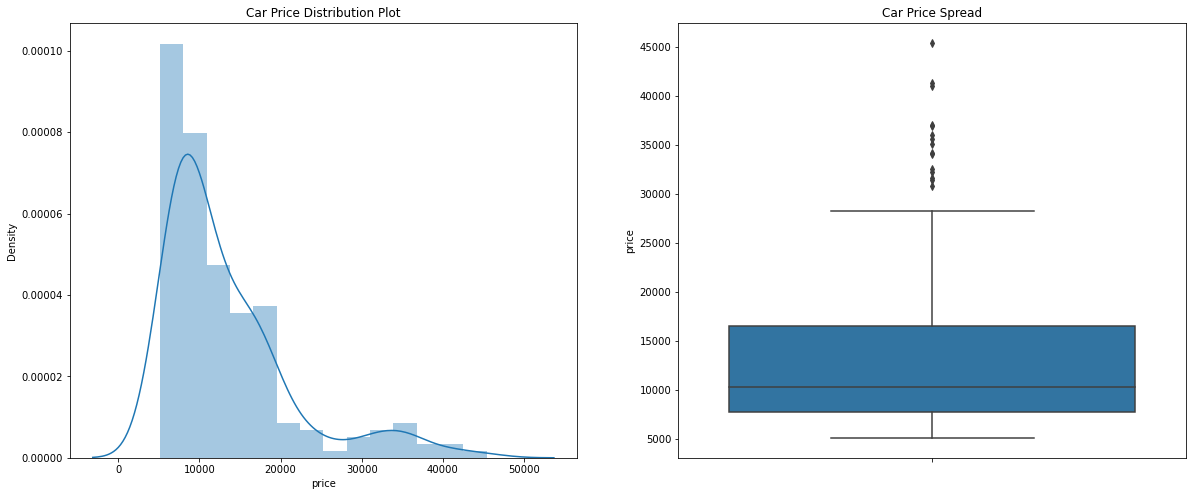

In [42]:
# Let's get some information about our target feature
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df['price'])

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df['price'])

plt.show()

Inference:

-The plot seemed to be right-skewed, meaning that the most prices in the dataset are low (below 15000).

-There is a significant difference between the mean and the median of the price distribution.

-The data points are far spread out from the mean, which indicates a high variance in the car prices. (85% of the prices below 18,500 whereas the remaining 15% are between 18,500 and 45,400.)

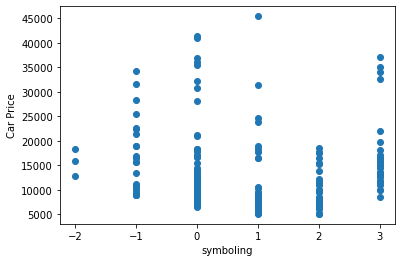

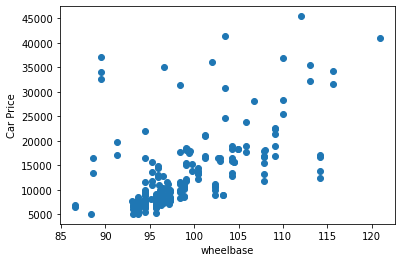

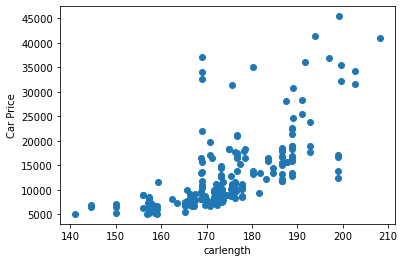

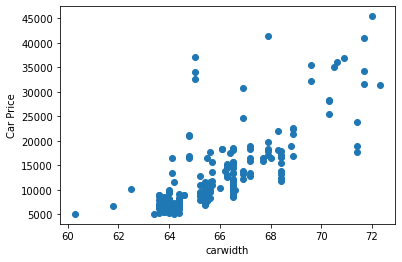

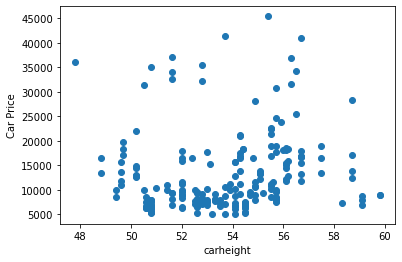

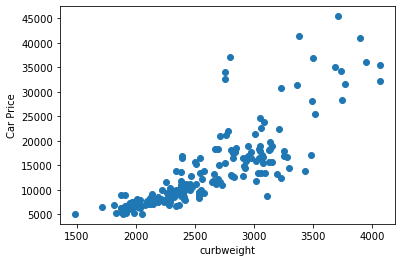

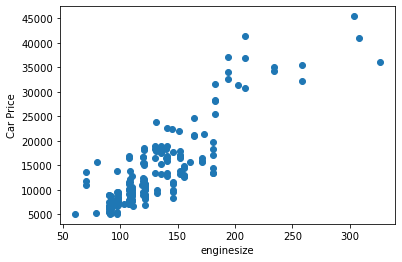

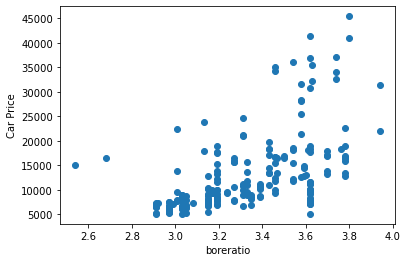

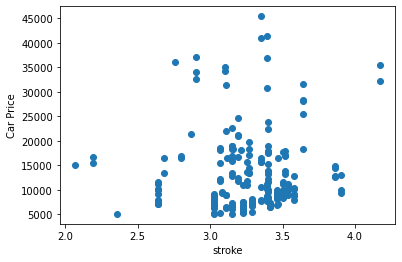

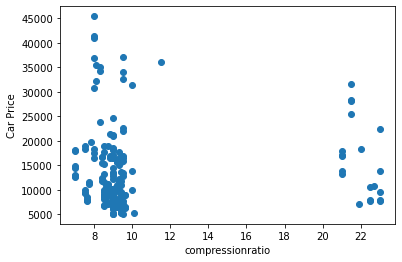

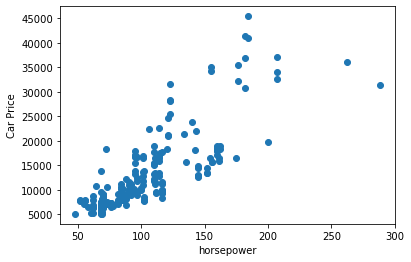

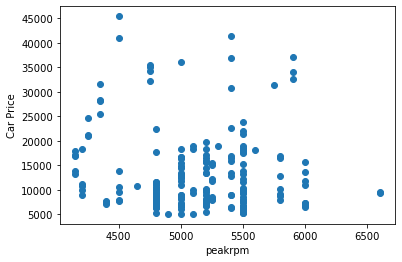

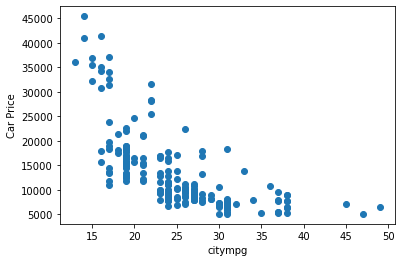

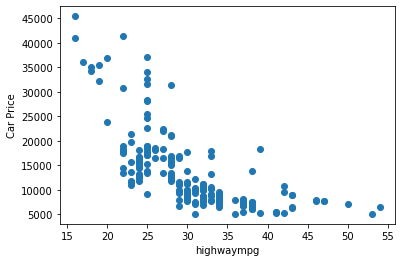

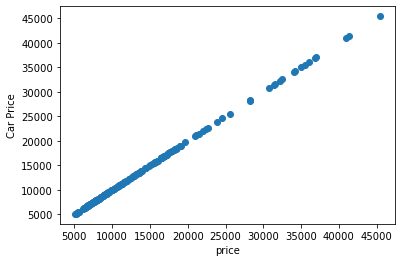

In [43]:
# Now let's find the relationship between independent and dependent numerical features

for feature in numerical_feature:
    if feature not in ['car_ID']:
        plt.scatter(y=df['price'],x=df[feature])
        plt.xlabel(feature)
        plt.ylabel("Car Price")
        plt.show()

Now let's find the relationship between each feature with other.

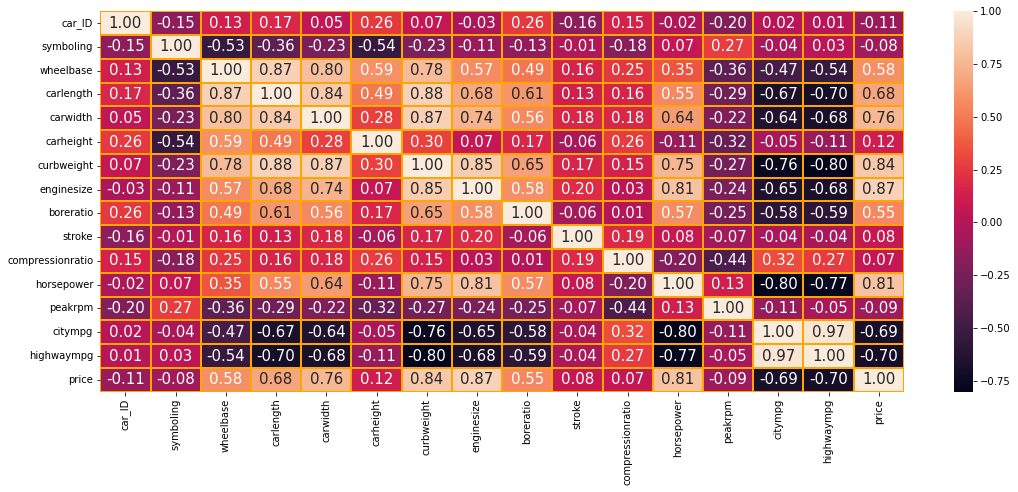

In [44]:
# heatmap of the data for checking the correlation between numerical features and target column.

plt.figure(figsize=(18,7))
sns.heatmap(df[numerical_feature].corr(), annot=True, fmt='0.2f', annot_kws={'size':15}, linewidths=2, linecolor='orange')
plt.show()

Correlation of numerical variables:

- wheelbase have positive correlation with price of 58%

- car length and car width have positive correlation with price of 68% and 76%

- curbweight have positive correlation with price of 84%

- enginesize have positive correlation with price of 87%

- boreratio have positive correlation with price of 55%

- horsepower have positive correlation with price of 81%

- citympg and highwaympg have negative correlation with price of 69% and 70%

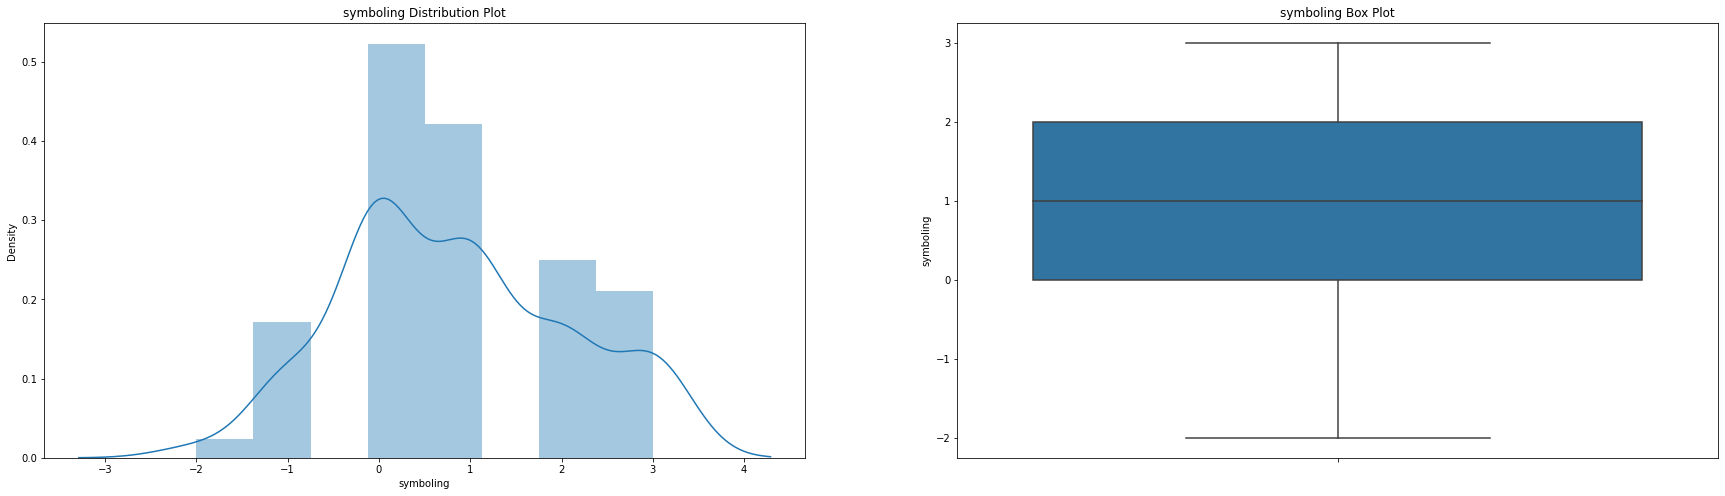

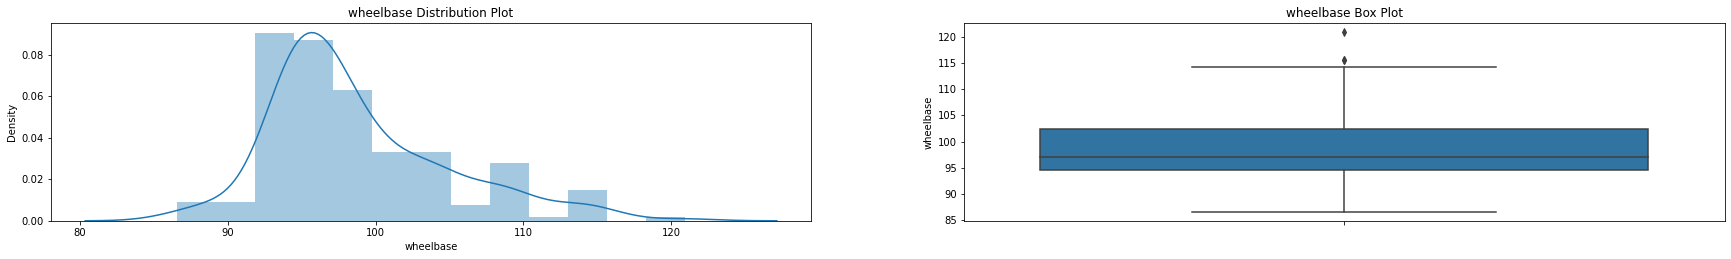

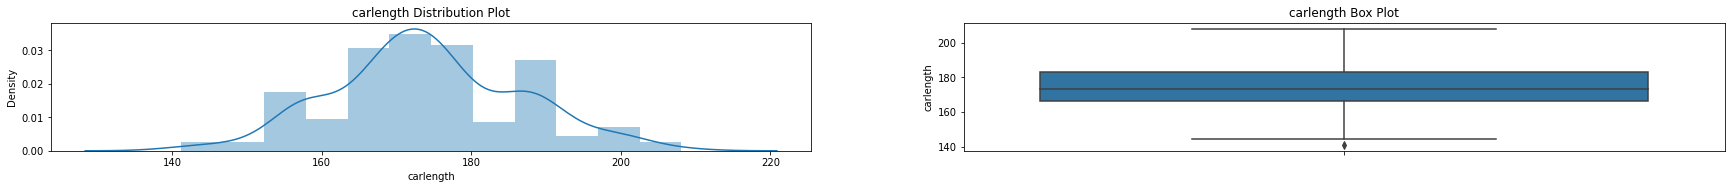

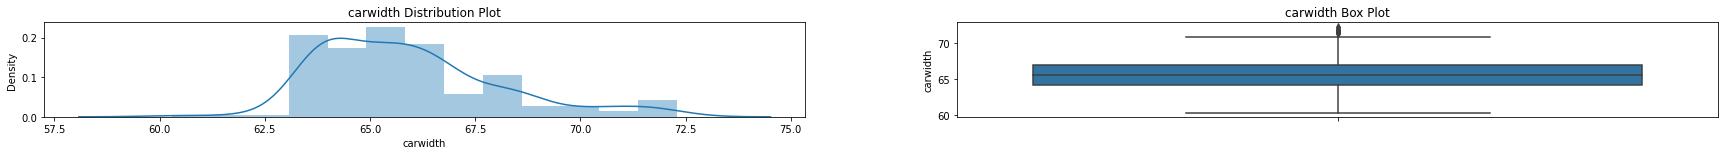

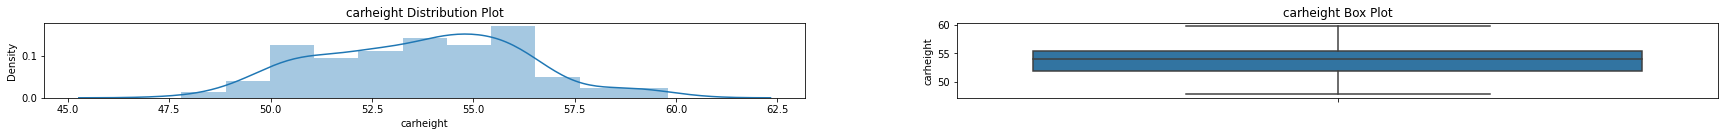

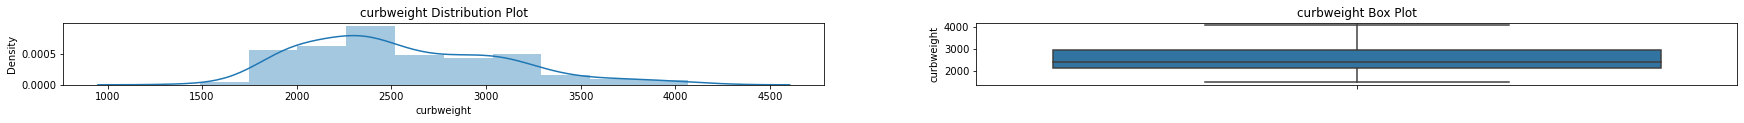

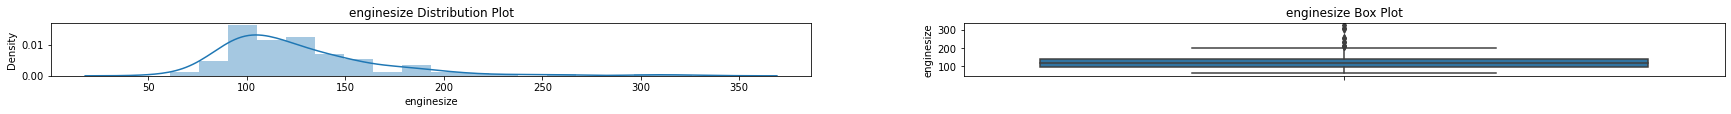

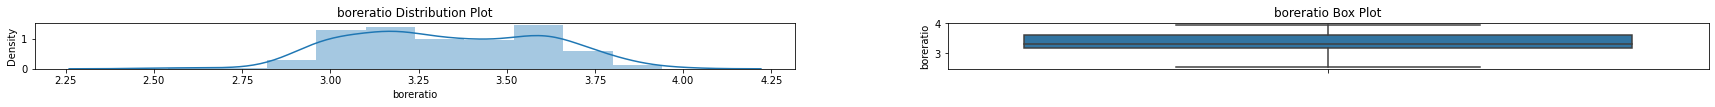

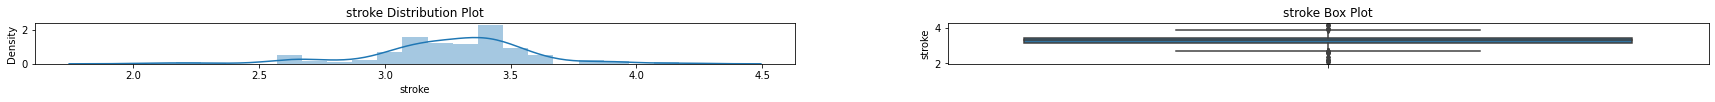

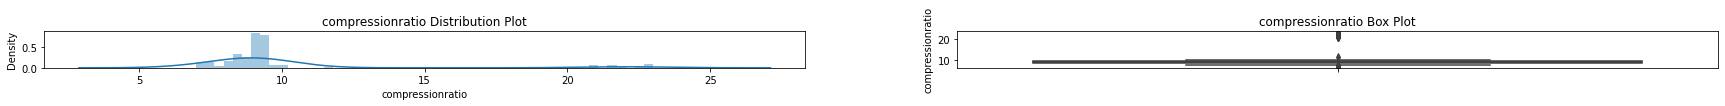

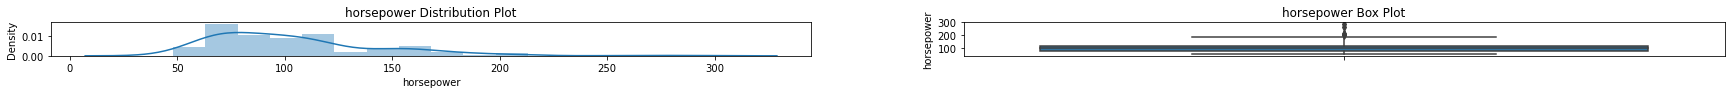

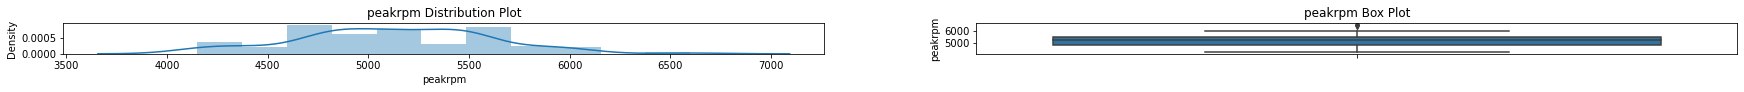

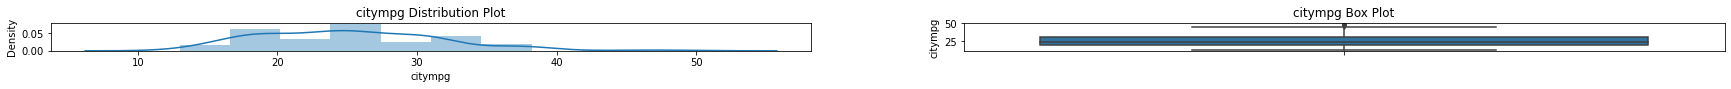

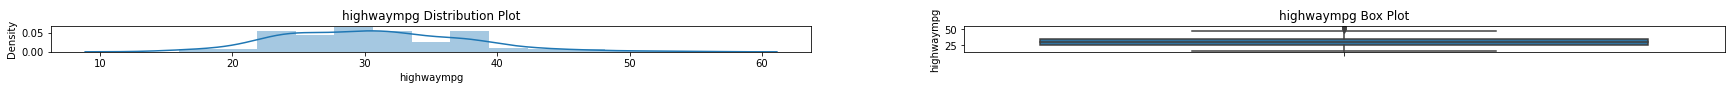

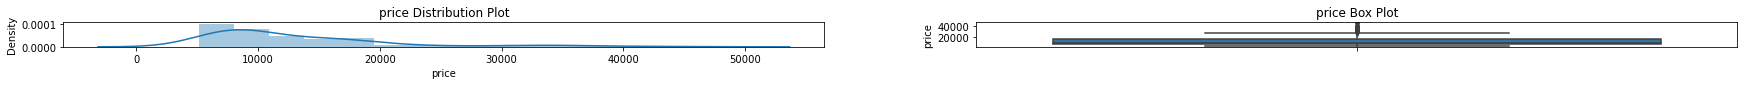

In [45]:
#### Let's find the distribution for each of these numerical features and also check for outliers

index=1
for feature in numerical_feature:
    if feature not in ['car_ID']:
        plt.figure(figsize=(30,8))
        
        #first plot
        plt.subplot(index,2,1)
        plt.title(feature+" Distribution Plot")
        sns.distplot(df[feature])
        
        #second plot
        plt.subplot(index,2,2)
        plt.title(feature+" Box Plot")
        sns.boxplot(y=df[feature])
        
        plt.show()
        index+=1

Now working with categorical features

In [46]:
# create a list to store all Categorical Variable
categorical_feature = [feature for feature in df.columns if df[feature].dtypes in ['O','object']]
print("Number of Categorical Variable: ",len(categorical_feature))
df[categorical_feature].head()

Number of Categorical Variable:  10


,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


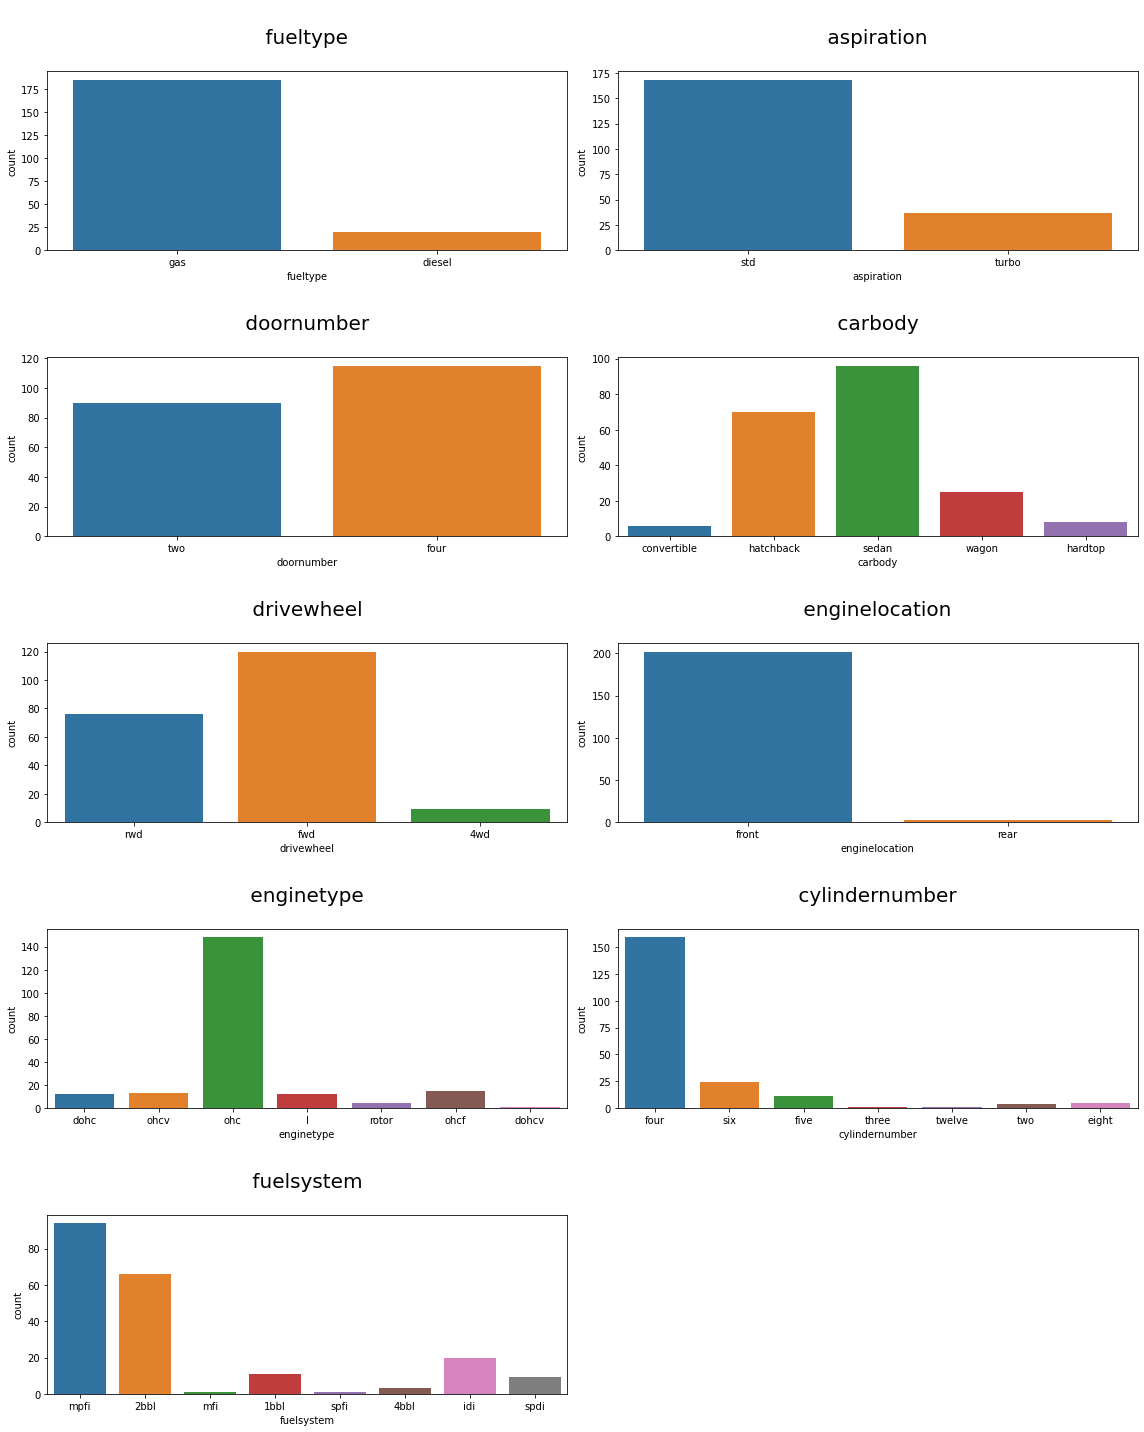

In [47]:
# Get counter plots for our categorical features
plt.figure(figsize=(16,20))
plotnumber=1

for i in range(1,len(categorical_feature)):
    if plotnumber<=10:
        ax = plt.subplot(5,2,plotnumber)
        sns.countplot(x=categorical_feature[i], data=df, ax=ax)
        plt.title(f"\n {categorical_feature[i]} \n",fontsize=20)
        
        plotnumber+=1
plt.tight_layout()
plt.show()

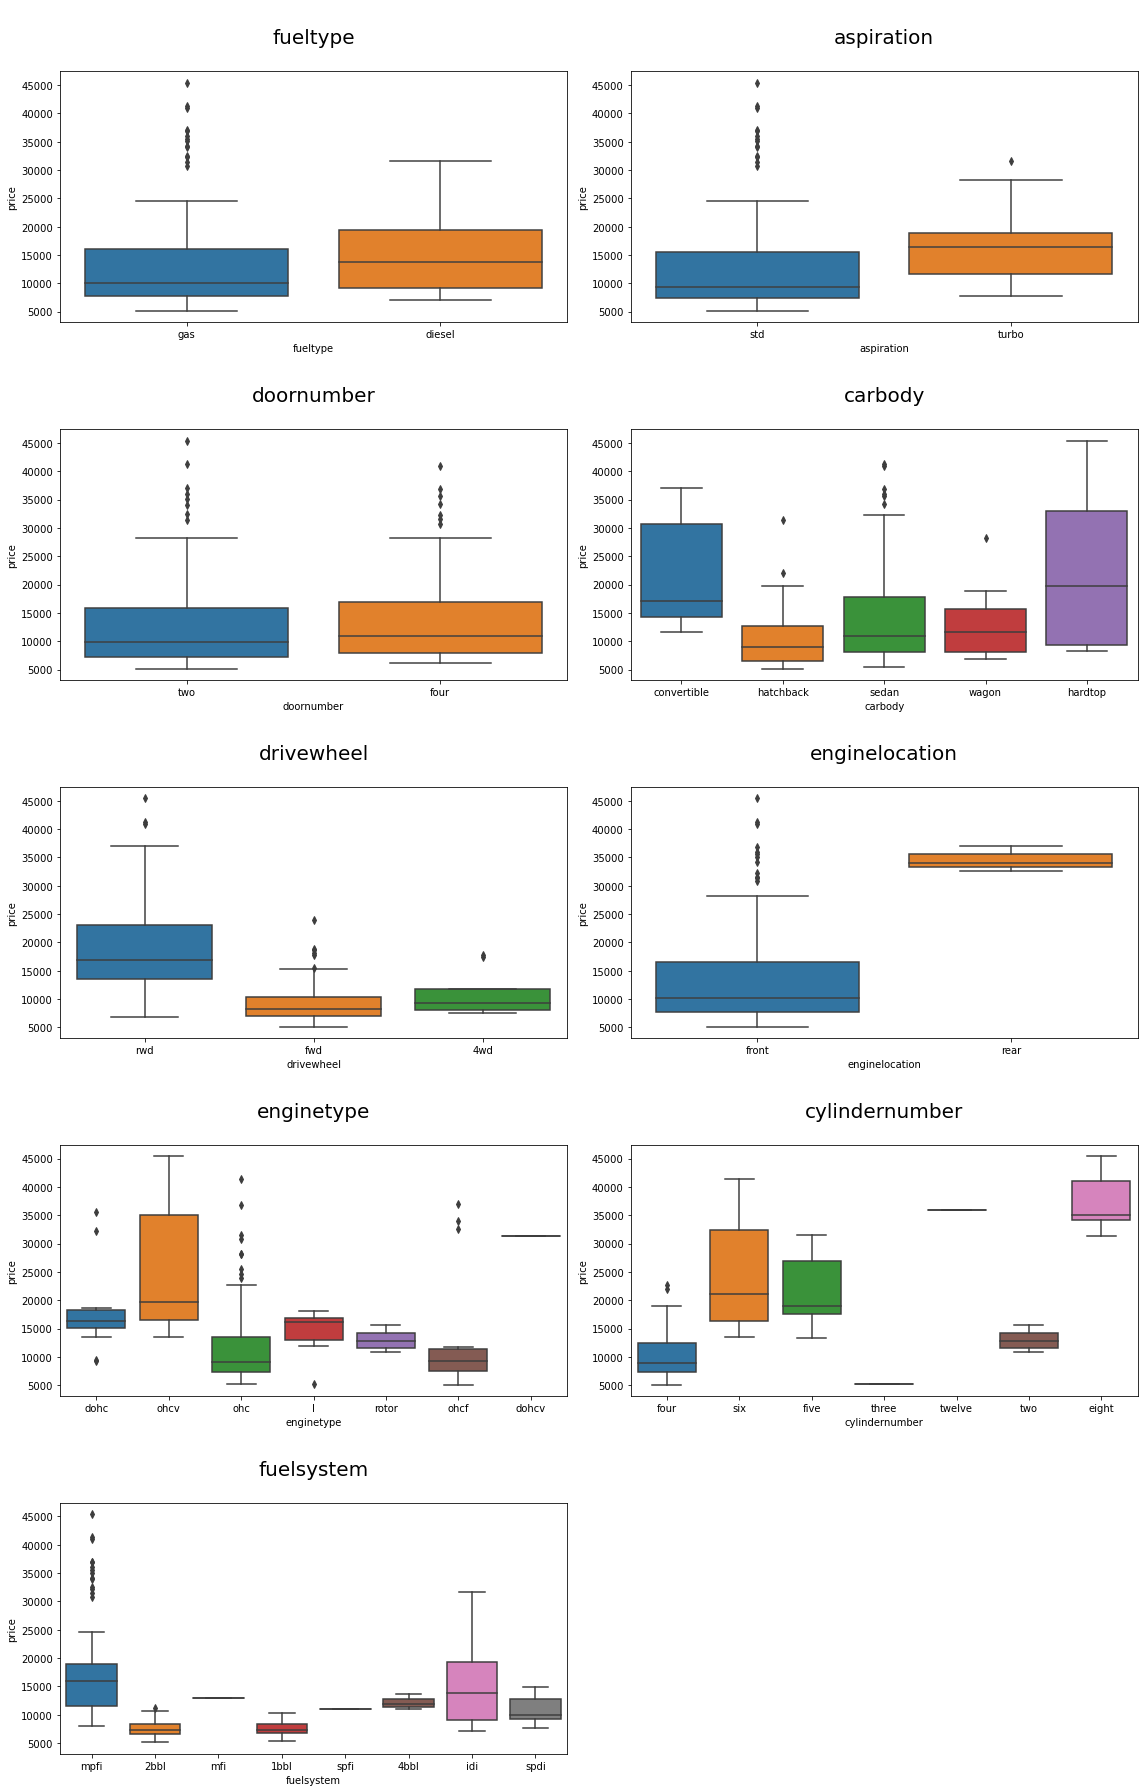

In [48]:
# Boxplot for each categorical features
plt.figure(figsize=(16,25))
plotnumber = 1

for i in range(1, len(categorical_feature)):
    if plotnumber <=10:
        ax = plt.subplot(5,2,plotnumber)
        sns.boxplot(x=categorical_feature[i], y=df['price'], data=df, ax=ax)
        plt.title(f"\n{categorical_feature[i]}\n",fontsize=20)
        
        plotnumber+=1
        
plt.tight_layout()
plt.show()

Conclusion:

- convertible, sedan and hardtop cars are costliers than others.

- hardtop cars are very less manufactured but their price is also higher.
- very few cars have engine at rear but if they have their price higher.
- ohc is the most type of engine used in cars and ohcv is used only in costly cars.
- mostly cars have 4 number of cylinder.
- if a car have higher number of cylinders then its price is also higher.
- mpfi and 2bbl are the most commonly fuel system used in cars.
- idi and spdi type of fuel system is used only in costly cars

Univarite Analysis

In [49]:
categorical_feature


['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [50]:
# Analysing the car name
df['CarName'].count()

205

In [51]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

Now extract car company name and use it instead of car name

In [52]:
# Splitting the Company name from CarName column
CompanyName = df['CarName'].apply(lambda x: x.split(' ')[0])
df.insert(3,"CompanyName",CompanyName)

In [53]:
df.drop(['CarName'],axis=1,inplace=True)
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Fixing Invalid Values:

There seems to be some spelling error in the CompanyName column.

- maxda = mazda
- Nissan = nissan
- porsche = porcshce
- toyota = toyouta
- volkswagen = vokswagen = vw

In [54]:
df['CompanyName'] = df['CompanyName'].str.lower()

def replace_name(a,b):
    df['CompanyName'].replace(a,b,inplace=True)
    
replace_name('maxda', 'mazda')
replace_name('nissan', 'Nissan')
replace_name('porcshce', 'porsche')
replace_name('toyouta', 'toyota')
replace_name('vokswagen', 'volkswagen')
replace_name('vw', 'volkswagen')

df['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [55]:
# Checking for duplicates
df.loc[df.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


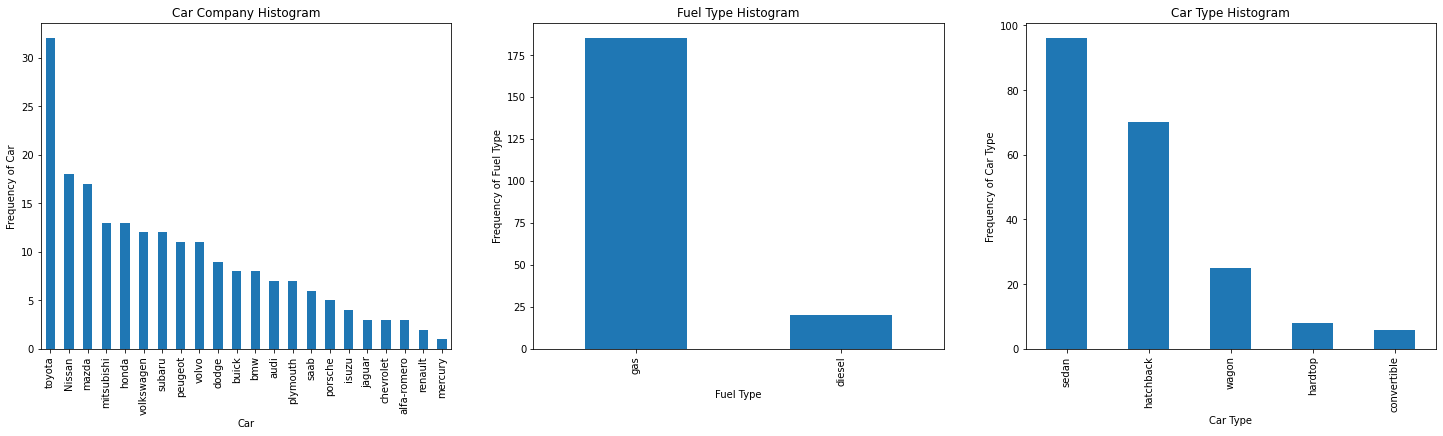

In [56]:
plt.figure(figsize=(25,6))

plt.subplot(1,3,1)
plt1 = df['CompanyName'].value_counts().plot(kind='bar')
plt.title('Car Company Histogram')
plt1.set(xlabel='Car',ylabel='Frequency of Car')

plt.subplot(1,3,2)
plt1 = df['fueltype'].value_counts().plot(kind='bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel='Fuel Type', ylabel='Frequency of Fuel Type')

plt.subplot(1,3,3)
plt1 = df['carbody'].value_counts().plot(kind='bar')
plt.title('Car Type Histogram')
plt1.set(xlabel='Car Type',ylabel='Frequency of Car Type')

plt.show()

Inference:
- toyoto seemed to be favored car company
- mercury is the less used car
- gas fueled cars are more than diesel
- sedan is the top car type prefered

Analysing other features as well

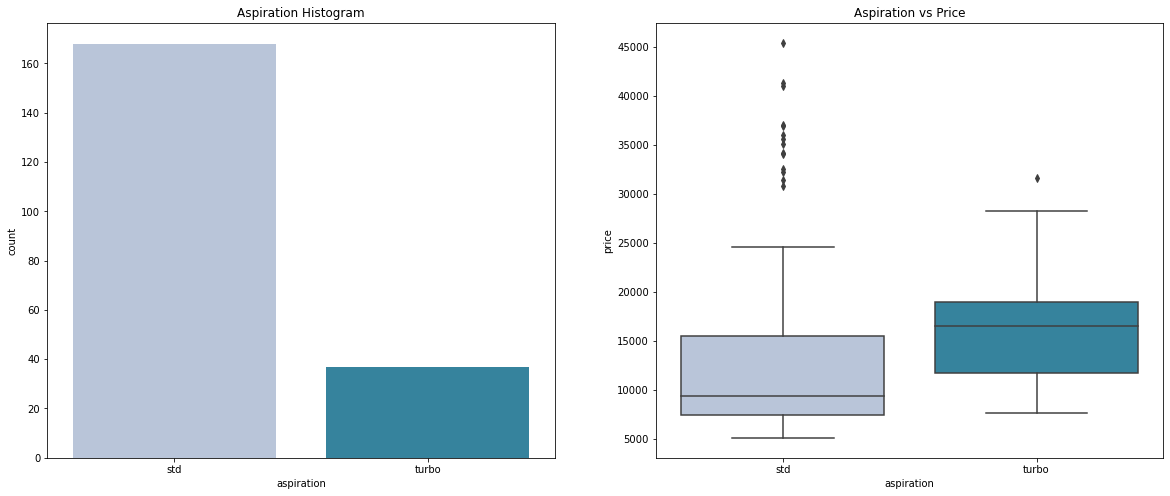

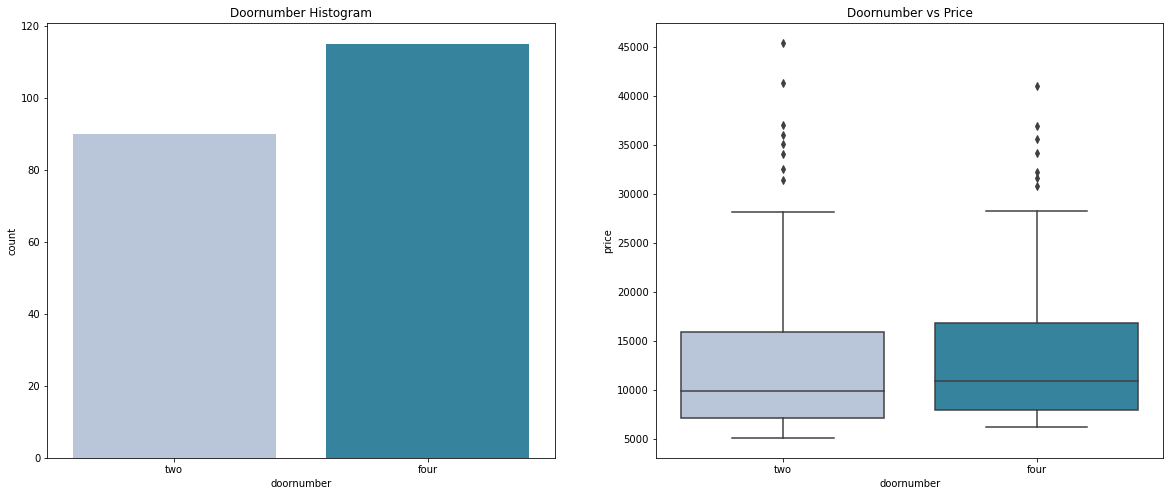

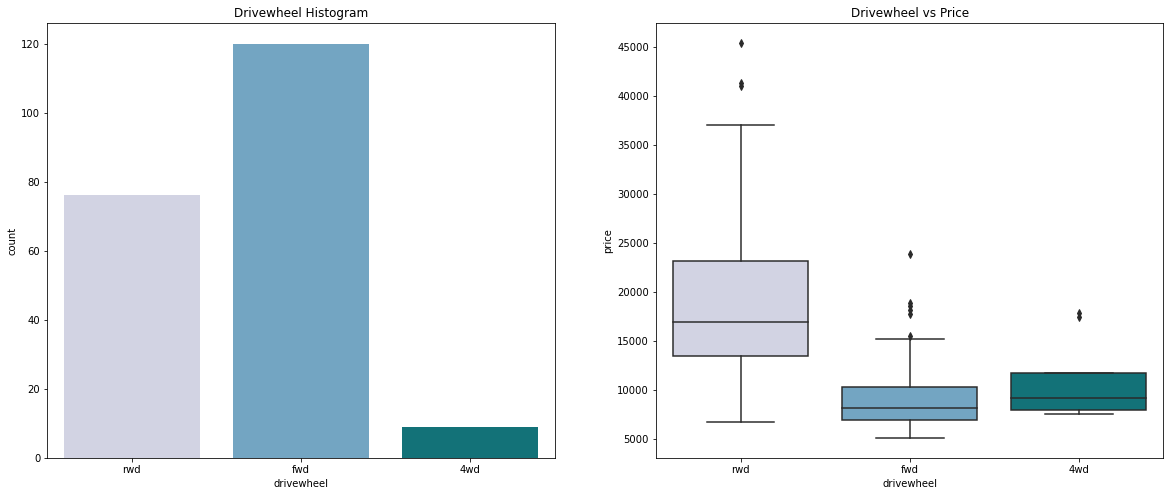

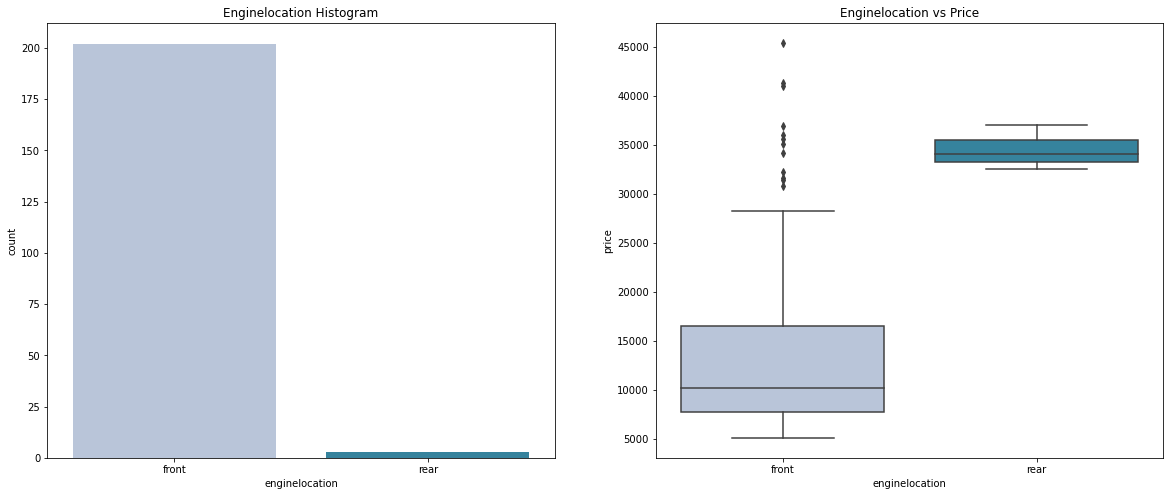

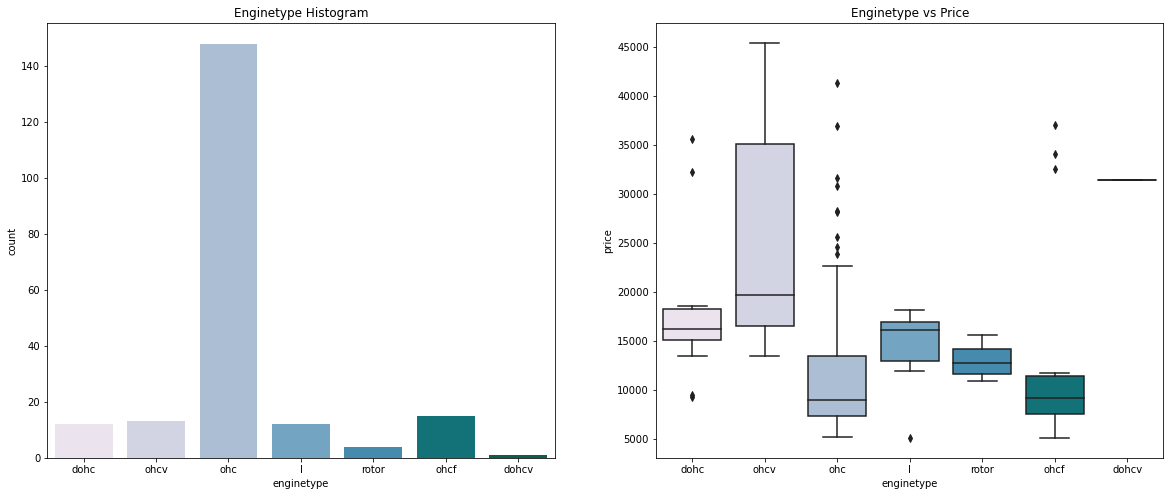

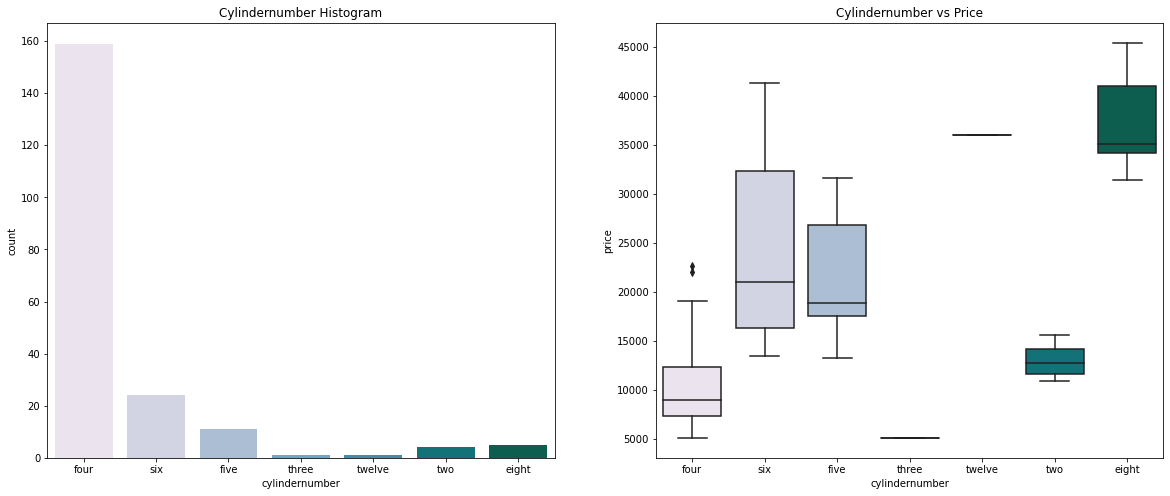

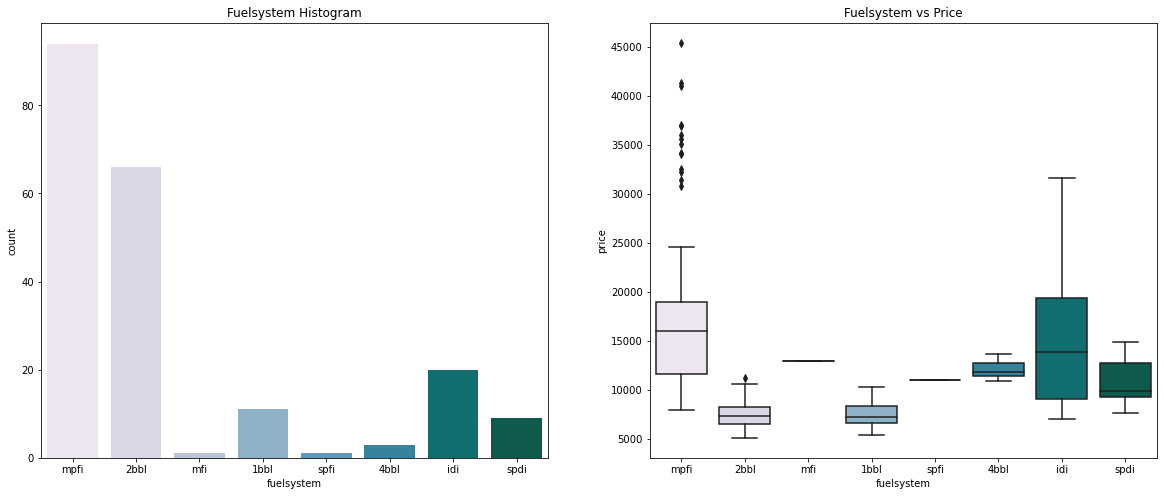

In [57]:
cat_columns = ['aspiration','doornumber','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']
for feature in cat_columns:
    plt.figure(figsize=(20,8))
    
    plt.subplot(1,2,1)
    plt.title(feature.title()+" Histogram")
    sns.countplot(x=df[feature],palette=('PuBuGn'))
    
    plt.subplot(1,2,2)
    plt.title(feature.title()+" vs Price")
    sns.boxplot(x=df[feature],y=df['price'],palette=('PuBuGn'))
    
plt.show()

Inference :
- It seems aspiration with turbo have higher price range than the std(though it has some high values outside the whiskers.)
- A very significant difference in drivewheel category. Most high ranged cars seeme to prefer rwd drivewheel.
- doornumber variable is not affacting the price much. There is no sugnificant difference between the categories in it.
- most cars have their engine on front side.
- ohcv has the highest price range (While dohcv has only one row), ohc and ohcf have the low price range.
- ohc Engine type seems to be most favored type.
- most cars have 4 cylinder.
- mpfi and 2bbl are most common type of fuel systems. mpfi and idi having the highest price range.

Bivariate and Multivariate Analysis

In [ ]:
sns.pairplot(df)
plt.show()

Data Preprocessing

In [ ]:
df.head()

In [ ]:
# drop the index from car dataset
df.drop